In [1]:
import pandas as pd

cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv(
    "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
    na_values=["9999", "", " ", "Presented but no response", "NA"],
    low_memory=False
)
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only



In [20]:
# Function to summarize numeric and categorical columns
def summarize_columns(data, columns):
    for col in columns:
        # Check for missing data
        missing_count = data[col].isna().sum()
        
        if pd.api.types.is_numeric_dtype(data[col]):
            # Numeric column summary
            print(f"Numeric Column: {col}")
            print(f"  Missing Count: {missing_count}")
            print(f"  Mean: {data[col].mean():.2f}")
            print(f"  Median: {data[col].median():.2f}")
            print(f"  Std Dev: {data[col].std():.2f}")
            print(f"  Min: {data[col].min():.2f}")
            print(f"  Max: {data[col].max():.2f}")
        elif pd.api.types.is_categorical_dtype(data[col]) or data[col].dtype == 'object':
            # Categorical column summary
            print(f"Categorical Column: {col}")
            print(f"  Missing Count: {missing_count}")
            print(f"  Unique Values: {data[col].nunique()}")
            print(f"  Top Value: {data[col].mode()[0] if not data[col].mode().empty else 'None'}")
            print(f"  Frequency of Top Value: {data[col].value_counts().iloc[0] if not data[col].value_counts().empty else 'None'}")
        else:
            # Other data types
            print(f"Column: {col}")
            print(f"  Missing Count: {missing_count}")
            print(f"  Data Type: {data[col].dtype}")
        
        print("-" * 40)  # Separator for readability

# Example usage
columns_to_examine = ['COVID_prevention_reduce_people', 'COVID_prevention_avoid_trips']
summarize_columns(data_cleaned, columns_to_examine)


Categorical Column: COVID_prevention_reduce_people
  Missing Count: 2611
  Unique Values: 3
  Top Value: Very closely
  Frequency of Top Value: 3875
----------------------------------------
Categorical Column: COVID_prevention_avoid_trips
  Missing Count: 2608
  Unique Values: 3
  Top Value: Very closely
  Frequency of Top Value: 3617
----------------------------------------


/tmp/ipykernel_86/2520626133.py:16: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[col]) or data[col].dtype == 'object':
/tmp/ipykernel_86/2520626133.py:16: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[col]) or data[col].dtype == 'object':


In [22]:
# Loop through all columns and print those with more than 5000 non-NaN values
usable_columns = []

for col in data_cleaned.columns:
    non_nan_count = data_cleaned[col].notna().sum()
    if non_nan_count > 5000:
        usable_columns.append(col)
        
usable_columns.sort()
print(usable_columns)


for col in usable_columns:
    print(col)

['CONNECTION_activities_church_pm', 'CONNECTION_activities_coffee_pm', 'CONNECTION_activities_community_pm', 'CONNECTION_activities_discussion_group_pm', 'CONNECTION_activities_greeted_neighbour_or_stranger_pm', 'CONNECTION_activities_group_exercise_pm', 'CONNECTION_activities_group_video_chat_pm', 'CONNECTION_activities_helped_pm', 'CONNECTION_activities_hug_pm', 'CONNECTION_activities_kissed_pm', 'CONNECTION_activities_meeting_non_work_pm', 'CONNECTION_activities_new_friend_pm', 'CONNECTION_activities_phone_pm', 'CONNECTION_activities_sex_pm', 'CONNECTION_activities_visited_family_pm', 'CONNECTION_activities_visited_friends_pm', 'CONNECTION_activities_walk_pm', 'CONNECTION_social_days_family_p7d_grouped', 'CONNECTION_social_days_friends_p7d_grouped', 'CONNECTION_social_days_neighbours_p7d_grouped', 'CONNECTION_social_num_family_p7d_grouped', 'CONNECTION_social_num_friends_p7d_grouped', 'CONNECTION_social_num_neighbours_p7d_grouped', 'CONNECTION_social_time_family_p7d_grouped', 'CONNE

[nan 'Hardly Ever' 'Often' 'Some of the time']


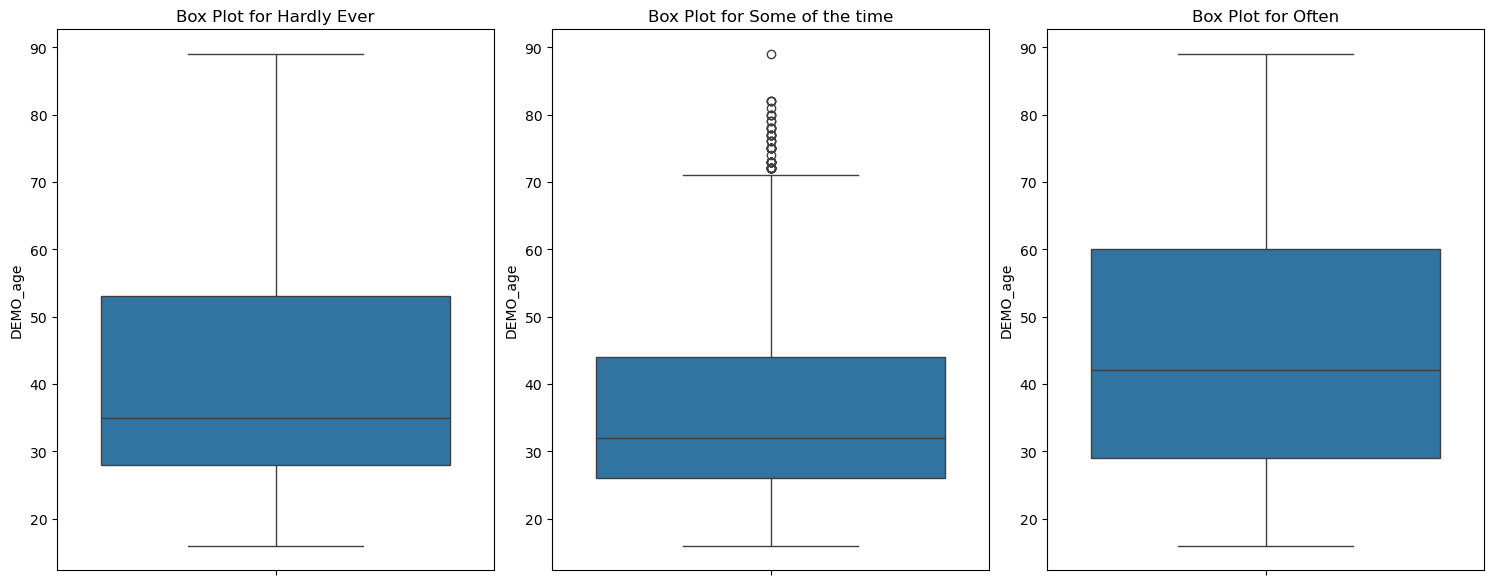

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique categories
raw_categories = data['LONELY_ucla_loneliness_scale_isolated'].unique()
print(raw_categories)

categories = []

categories.append(raw_categories[1])
categories.append(raw_categories[3])
categories.append(raw_categories[2])

# Create a subplot grid for multiple box plots
fig, axes = plt.subplots(1, len(categories), figsize=(15, 6))  # Adjust grid dimensions
fig.tight_layout()

# Plot each category's box plot
for i, category in enumerate(categories):
    subset = data[data['LONELY_ucla_loneliness_scale_isolated'] == category]
    sns.boxplot(y='DEMO_age', data=subset, ax=axes[i])
    axes[i].set_title(f'Box Plot for {category}')
    axes[i].set_xlabel('')

plt.show()


In [26]:
import matplotlib.pyplot as plt

A = 'DEMO_age'
B = 'LONELY_ucla_loneliness_scale_isolated'

print(data_cleaned[A].dropna().size)
# Ensure numeric data
data_cleaned[A] = pd.to_numeric(data_cleaned[A], errors='coerce')
data_cleaned[B] = pd.to_numeric(data_cleaned[B], errors='coerce')

# Drop rows with missing values in these columns
scatter_data = data_cleaned.dropna(subset=[A, B])

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(
    scatter_data[A],
    scatter_data[B],
    alpha=0.5
)
plt.title('COVID Prevention vs. Loneliness (Emptiness Scale)')
plt.xlabel('COVID Prevention Distancing')
plt.ylabel('Emotional/Social Loneliness (Emptiness Scale)')
plt.grid(True)
plt.show()


10220


/tmp/ipykernel_86/2394823842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[A] = pd.to_numeric(data_cleaned[A], errors='coerce')


KeyError: 'LONELY_ucla_loneliness_scale_isolated'

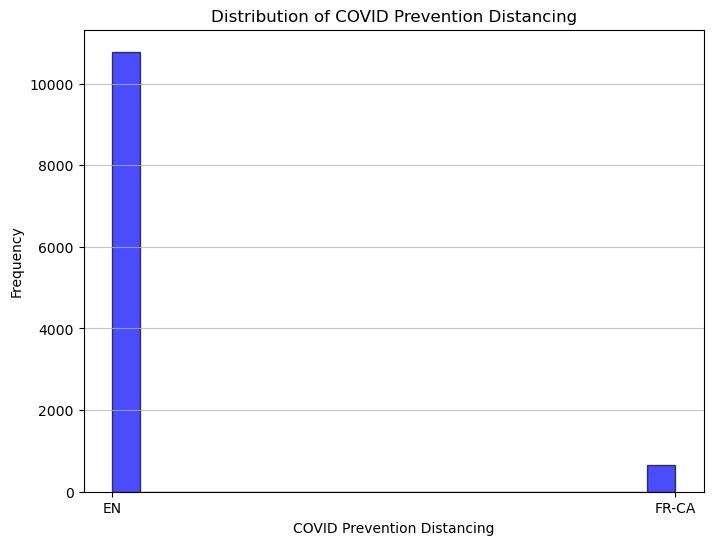

In [17]:
import matplotlib.pyplot as plt

# Drop missing values
dist_data = data_cleaned['SURVEY_user_language'].dropna()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(dist_data, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of COVID Prevention Distancing')
plt.xlabel('COVID Prevention Distancing')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
